In [1]:
%install_ext https://raw.githubusercontent.com/meduz/ipython_magics/master/tikzmagic.py

Installed tikzmagic.py. To use it, type:
  %load_ext tikzmagic


/usr/local/lib/python3.5/site-packages/IPython/core/magics/extension.py:47: UserWarning: %install_ext` is deprecated, please distribute your extension as a python package.
  "as a python package.", UserWarning)


In [2]:
%load_ext tikzmagic

a MWE

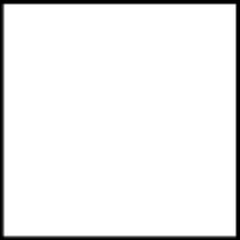

In [3]:
%tikz \draw (0,0) rectangle (1,1);

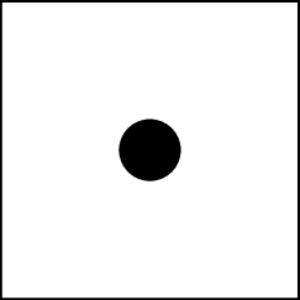

In [4]:
%%tikz --scale 2 --size 300,300 -f jpg
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

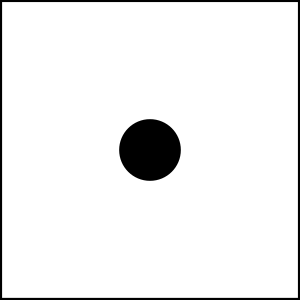

In [5]:
%%tikz --scale 2 --size 300,300 -f svg
\draw (0,0) rectangle (1,1);
\filldraw (0.5,0.5) circle (.1);

An example for scaling and exporting to a graphics format

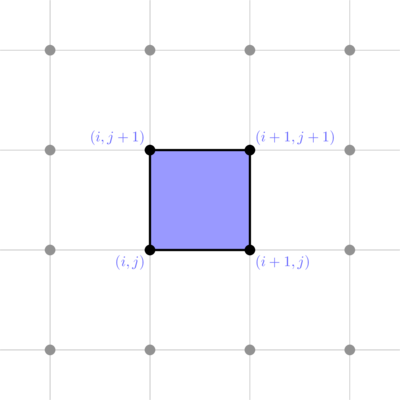

In [6]:
%%tikz -s 400,400 -sc 1.2 -f png
\draw [style=help lines, step=2]				(-1,-1)	grid		(+7,+7);
\draw [line width=0.5mm, fill=blue!40!white]	(+2,+2)	rectangle	(+4,+4);
 
\draw [blue!60!white] (  2,  2) node[anchor=north east] {$(i  ,j  )$};
\draw [blue!60!white] (  4,  2) node[anchor=north west] {$(i+1,j  )$};
\draw [blue!60!white] (  4,  4) node[anchor=south west] {$(i+1,j+1)$};
\draw [blue!60!white] (  2,  4) node[anchor=south east] {$(i  ,j+1)$};

\filldraw [color=gray]	(0,0) circle (.1);
\filldraw [color=gray]	(0,2) circle (.1);
\filldraw [color=gray]	(0,4) circle (.1);
\filldraw [color=gray]	(0,6) circle (.1);
\filldraw [color=gray]	(2,0) circle (.1);
\filldraw [color=black]	(2,2) circle (.1);
\filldraw [color=black]	(2,4) circle (.1);
\filldraw [color=gray]	(2,6) circle (.1);
\filldraw [color=gray]	(4,0) circle (.1);
\filldraw [color=black]	(4,2) circle (.1);
\filldraw [color=black]	(4,4) circle (.1);
\filldraw [color=gray]	(4,6) circle (.1);
\filldraw [color=gray]	(6,0) circle (.1);
\filldraw [color=gray]	(6,2) circle (.1);
\filldraw [color=gray]	(6,4) circle (.1);
\filldraw [color=gray]	(6,6) circle (.1);


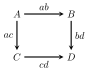

In [7]:
%%tikz -l arrows,matrix -f svg
\matrix (m) [matrix of math nodes, row sep=3em, column sep=4em] {
A & B \\
C & D \\
};
\path[-stealth, line width=.4mm]
(m-1-1) edge node [left ] {$ac$} (m-2-1)
(m-1-1) edge node [above] {$ab$} (m-1-2)
(m-1-2) edge node [right] {$bd$} (m-2-2)
(m-2-1) edge node [below] {$cd$} (m-2-2);


An additional flag ``-svgsc`` allows scaling of the final image in the notebook view.

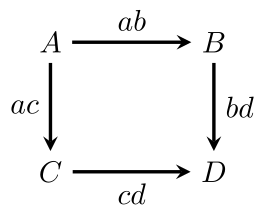

In [8]:
%%tikz -l arrows,matrix -f svg  -svgsc 3
\matrix (m) [matrix of math nodes, row sep=3em, column sep=4em] {
A & B \\
C & D \\
};
\path[-stealth, line width=.4mm]
(m-1-1) edge node [left ] {$ac$} (m-2-1)
(m-1-1) edge node [above] {$ab$} (m-1-2)
(m-1-2) edge node [right] {$bd$} (m-2-2)
(m-2-1) edge node [below] {$cd$} (m-2-2);


A more challenging exemple used in Figure 1 of this paper: http://www.nature.com/articles/srep11400

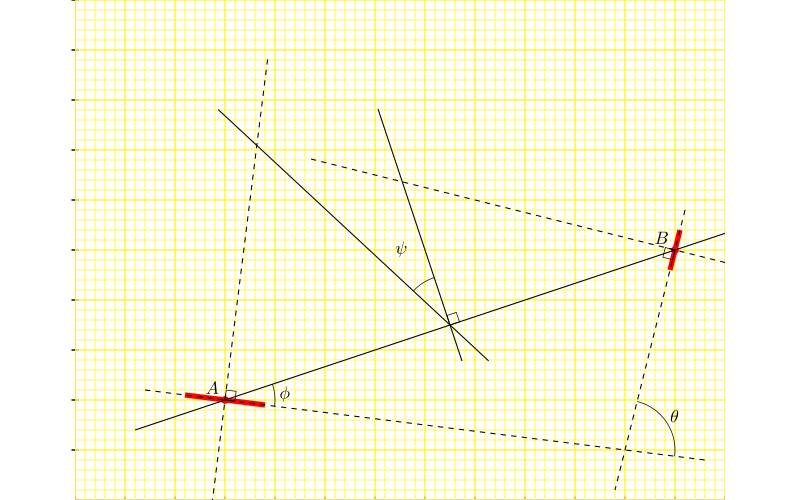

In [9]:
%%tikz -f svg -s 800,500 
\begin{scope}%[xshift=16cm, yshift=4cm]
   \tkzInit[xmax=15, ymax=10]
   \tkzAxeXY
   \tkzGrid[sub,color=yellow]

    %----------------------------------------------------------
	% Defining coordinates
	%----------------------------------------------------------

   \tkzDefPoint(3,2){A}
   \tkzDefPoint(12,5){B}
   \tkzLabelPoints[above left](B,A)
   \tkzDefPoint(11, 1){C}
  
   % draw red dots at the center of edges
   \tkzDrawPoints[size=10, color=red, fill=red](A,B)

	%----------------------------------------------------------
	% Drawing the lines and segments
	%----------------------------------------------------------
    \tkzDrawLine[color=red,line width=3pt, add=-1.1 and -.1 ](C,A)
    \tkzDrawLine[color=red,line width=3pt, add=-1.1 and -.1 ](C,B)
  
    \tkzDrawLine(A,B)
    \tkzDrawLines[dashed](A,C B,C)

   % drawing arcs for angles  
   \tkzMarkAngle[size=1](C,A,B)
   \tkzLabelAngle[pos=1.2,circle](C,A,B){$\mathsf{\phi}$}

   \tkzDefPointWith[linear,K=1.5](A,C)
   \tkzGetPoint{D}
   \tkzDefPointWith[linear,K=.75](B,C)
   \tkzGetPoint{E}
   \tkzMarkAngle[size=1](D,C,E)
   \tkzLabelAngle[pos=1.2,circle](D,C,E){$\mathsf{\theta}$}

    %----------------------------------------------------------
	% Drawing normals
	%----------------------------------------------------------

    \tkzDefLine[perpendicular=through A, K=.1](C,A)
    \tkzGetPoint{a1}
    \tkzDefLine[perpendicular=through A, K=-.7](C,A)
    \tkzGetPoint{a2}
    \tkzDefLine[perpendicular=through B, K=1.5](C,B)
    \tkzGetPoint{b1}
    \tkzDefLine[perpendicular=through B, K=-.1](C,B)
    \tkzGetPoint{b2}
    \tkzInterLL(a1,a2)(b1,b2)  \tkzGetPoint{H}
    \tkzMarkRightAngle[size=.2](H,A,C)
    \tkzMarkRightAngle[size=.2](H,B,C)
    \tkzDrawLines[dashed](a1,a2 b1,b2)

    %----------------------------------------------------------
	% Drawing mediator and psi line
	%----------------------------------------------------------
%    \tkzDefLine[mediator](A,B)          \tkzGetPoints{m1}{M}
    \tkzDefMidPoint(A,B)
    \tkzGetPoint{M}
    \tkzDefLine[perpendicular=through M, K=.4](A,B)
    \tkzGetPoint{m1}
%    \tkzDefLine[perpendicular=through M, K=-.3](A,B)
%    \tkzGetPoint{m2}
    \tkzMarkRightAngle[size=.2](B,M,m1)    
    
    \tkzDrawLines[](m1,M M,H)
    \tkzMarkAngle[size=1](m1,M,H)
    \tkzLabelAngle[pos=1.8,circle](m1,M,H){$\mathsf{\psi}$}%= \phi -\theta/2

    \pgfresetboundingbox
    \path(0, 0) rectangle (13, 10);

    \end{scope}